In [2]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [3]:
!pip install folium

     |████████████████████████████████| 92kB 6.5MB/s eta 0:00:011


In [4]:
import folium
print('folium imported')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ddbc86de65744c1d81b5bd0b750a9ac8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cMzu4demBRhvL3Dx-HOsWBrn4IRaVFL3A69lJ1GDLV4e',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ddbc86de65744c1d81b5bd0b750a9ac8.get_object(Bucket='courseracapstone-donotdelete-pr-msyrwf8cg9cudg',Key='Book1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()
df=df_data_0

folium imported


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
chennai_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [7]:
chennai_population.head()

,Borough,Neighborhoods,Population
0,South and East Chennai,Tambaram,174787
1,South and East Chennai,Chitlapakkam,37906
2,South and East Chennai,Kovilambakkam,27374
3,South and East Chennai,Medavakkam,29710
4,South and East Chennai,Pallikaranai,43493


In [8]:
chennai_population.to_csv(r'C:\Users\1131689\Desktop\Book2.csv')

In [9]:
chennai_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [10]:
chennai_income.head()

,Borough,Neighborhoods,AverageIncome
0,South and East Chennai,Tambaram,18944.099790
1,South and East Chennai,Chitlapakkam,56837.022200
2,South and East Chennai,Kovilambakkam,41991.817440
3,South and East Chennai,Medavakkam,6667.447632
4,South and East Chennai,Pallikaranai,53270.063890


In [11]:
chennai_income.to_csv(r'C:\Users\1131689\Desktop\Book3.csv')

In [12]:
chennai_latitude = df['Latitude'].mean()
chennai_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Chennai are : ",chennai_latitude,chennai_longitude)


Latitude and Longitude of Chennai are :  12.919794749999998 80.17039125


In [93]:
chennai_income

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,South and East Chennai,Tambaram,18944.099790,0.208251
1,South and East Chennai,Chitlapakkam,56837.022200,0.624806
2,South and East Chennai,Kovilambakkam,41991.817440,0.461613
3,South and East Chennai,Medavakkam,6667.447632,0.073295
4,South and East Chennai,Pallikaranai,53270.063890,0.585594
5,South and East Chennai,Sembakkam,50712.430220,0.557478
6,South and East Chennai,Sholinganallur,90967.535870,1.000000
7,South and East Chennai,Vengavasal,55850.962100,0.613966


In [13]:
df.dtypes

Borough           object
Neighborhoods     object
Latitude         float64
Longitude        float64
Population         int64
City              object
AverageIncome    float64
dtype: object

In [14]:
df['Longitude'].astype('float64')

0    80.127457
1    80.134850
2    80.192596
3    80.192352
4    80.203148
5    80.155980
6    80.167747
7    80.189000
Name: Longitude, dtype: float64

In [15]:
CLIENT_ID = 'HFDEAKVBOOVKTH4AAC5GSG5QW1B5IR4VRVZFRGTZ5VM2OFTX'
CLIENT_SECRET = 'WXD4ZYTA4WRXY2UK3V52SWALKEOEJI4D4OPJLKZEVE1J3DEE'
VERSION = '20180606'
LIMIT = 150

In [16]:
unique_boroughs_of_chennai = df['Borough'].unique().tolist()

In [17]:
unique_boroughs_of_chennai

['South and East Chennai']

In [18]:
borough_colors ={}
for i in unique_boroughs_of_chennai:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [19]:

borough_colors

{'South and East Chennai': '#AA2328'}

In [20]:
chennai_map = folium.Map(location=[chennai_latitude,chennai_longitude],zoom_start=12,control_scale=True)

In [21]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(chennai_map)

In [22]:
chennai_map

## Exploring Chennai Neighborhoods using FourSquare API

In [23]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [24]:
chennai_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Tambaram
Fetching venues for :  Chitlapakkam
Fetching venues for :  Kovilambakkam
Fetching venues for :  Medavakkam
Fetching venues for :  Pallikaranai
Fetching venues for :  Sembakkam
Fetching venues for :  Sholinganallur
Fetching venues for :  Vengavasal


In [25]:
print("Total number of venues found in Chennai are : ",chennai_venues.shape[0])

Total number of venues found in Chennai are :  24


In [26]:
chennai_venues

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tambaram,South and East Chennai,12.922915,80.127457,Harithakom,12.922798,80.127328,Food
1,Tambaram,South and East Chennai,12.922915,80.127457,Captain's Corner,12.922469,80.128757,Tea Room
2,Tambaram,South and East Chennai,12.922915,80.127457,Vasan Eye Care,12.922429,80.128757,Optical Shop
3,Tambaram,South and East Chennai,12.922915,80.127457,tambaram railway ground,12.925500,80.127023,Soccer Field
4,Tambaram,South and East Chennai,12.922915,80.127457,"Ashwin Gym, East Tambaram, Chennai",12.926182,80.129000,Gym / Fitness Center
5,Tambaram,South and East Chennai,12.922915,80.127457,Authoor Mani Hotel,12.926617,80.127437,Breakfast Spot
6,Chitlapakkam,South and East Chennai,12.943640,80.134850,Domino's Pizza,12.941817,80.132557,Pizza Place
7,Chitlapakkam,South and East Chennai,12.943640,80.134850,KFC,12.943175,80.133996,Fast Food Restaurant
8,Chitlapakkam,South and East Chennai,12.943640,80.134850,Hot chips,12.943089,80.133888,Asian Restaurant
9,Chitlapakkam,South and East Chennai,12.943640,80.134850,"Reliance Fresh, Chromepet",12.944700,80.136837,Department Store


In [27]:
chennai_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Pizza Place             3
Fast Food Restaurant    2
ATM                     2
Pharmacy                1
Convenience Store       1
Asian Restaurant        1
Bakery                  1
Breakfast Spot          1
Café                    1
Chinese Restaurant      1
Name: Neighborhood, dtype: int64

In [28]:
print("Total number of unique categories in bangalore are : ",len(chennai_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  20


### Getting number of venues per neighborhood

In [29]:
individual_chennai_venue_count = chennai_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [30]:
individual_chennai_venue_count

Borough
Borough                Neighborhood          
South and East Chennai Chitlapakkam         4
                       Kovilambakkam        2
                       Medavakkam           5
                       Pallikaranai         3
                       Sembakkam            4
                       Tambaram             6

In [31]:

individual_chennai_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [32]:
individual_chennai_venue_count.reset_index(inplace=True)

In [33]:

individual_chennai_venue_count

,Borough,Neighborhood,NumberOfVenues
0,South and East Chennai,Chitlapakkam,4
1,South and East Chennai,Kovilambakkam,2
2,South and East Chennai,Medavakkam,5
3,South and East Chennai,Pallikaranai,3
4,South and East Chennai,Sembakkam,4
5,South and East Chennai,Tambaram,6


[Text(0, 0, 'Chitlapakkam'),
 Text(0, 0, 'Kovilambakkam'),
 Text(0, 0, 'Medavakkam'),
 Text(0, 0, 'Pallikaranai'),
 Text(0, 0, 'Sembakkam'),
 Text(0, 0, 'Tambaram')]

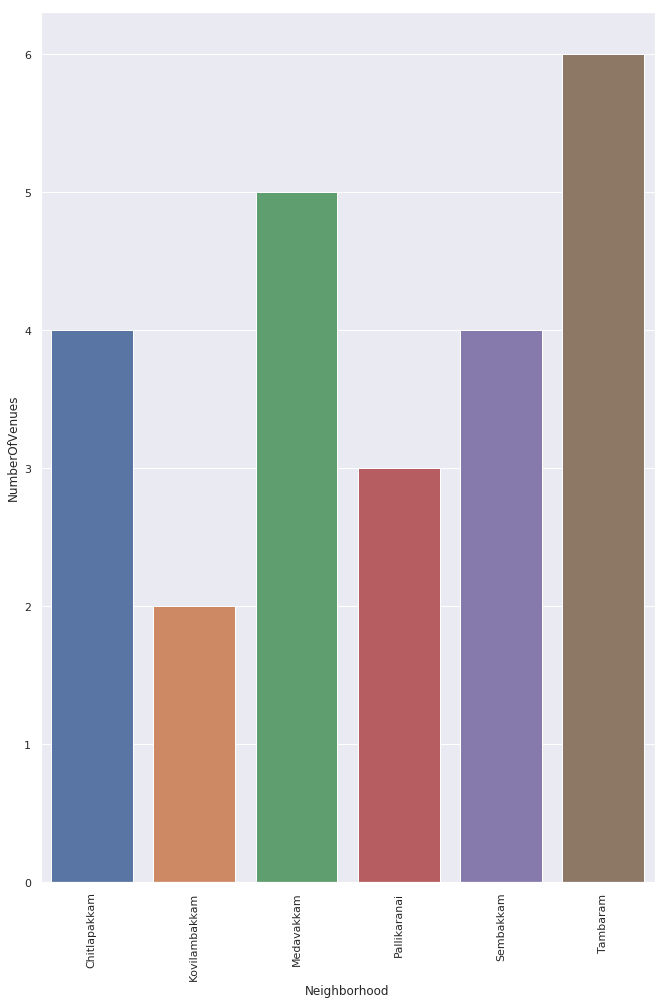

In [34]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_chennai_venue_count)
plot.set_xticklabels(individual_chennai_venue_count['Neighborhood'],rotation=90)

## Exploring Tambaram venues

In [35]:
chennai_venues[chennai_venues['Neighborhood']=='Tambaram']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tambaram,South and East Chennai,12.922915,80.127457,Harithakom,12.922798,80.127328,Food
1,Tambaram,South and East Chennai,12.922915,80.127457,Captain's Corner,12.922469,80.128757,Tea Room
2,Tambaram,South and East Chennai,12.922915,80.127457,Vasan Eye Care,12.922429,80.128757,Optical Shop
3,Tambaram,South and East Chennai,12.922915,80.127457,tambaram railway ground,12.925500,80.127023,Soccer Field
4,Tambaram,South and East Chennai,12.922915,80.127457,"Ashwin Gym, East Tambaram, Chennai",12.926182,80.129000,Gym / Fitness Center
5,Tambaram,South and East Chennai,12.922915,80.127457,Authoor Mani Hotel,12.926617,80.127437,Breakfast Spot


## One hot encoding for letting us to compare different venues based on some common scale

In [36]:
chennai_venues_onehot = pd.get_dummies(chennai_venues[['Venue Category']])

In [37]:
chennai_venues_onehot

,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Department Store,Venue Category_Fast Food Restaurant,Venue Category_Food,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Optical Shop,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Soccer Field,Venue Category_Tea Room
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [38]:
chennai_venues_onehot['Neighborhood'] = chennai_venues['Neighborhood']
chennai_venues_grouped = chennai_venues_onehot.groupby('Neighborhood').mean().reset_index()
chennai_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Department Store,...,Venue Category_Food,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Optical Shop,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Soccer Field,Venue Category_Tea Room
0,Chitlapakkam,0.000000,0.25,0.0,0.000000,0.00,0.0,0.00,0.0,0.25,...,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.25,0.000000,0.000000
1,Kovilambakkam,0.000000,0.00,0.0,0.000000,0.00,0.0,0.00,0.0,0.00,...,0.000000,0.000000,0.5,0.0,0.00,0.000000,0.5,0.00,0.000000,0.000000
2,Medavakkam,0.000000,0.00,0.2,0.000000,0.00,0.2,0.00,0.2,0.00,...,0.000000,0.000000,0.0,0.2,0.00,0.000000,0.0,0.20,0.000000,0.000000
3,Pallikaranai,0.666667,0.00,0.0,0.000000,0.00,0.0,0.00,0.0,0.00,...,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.000000
4,Sembakkam,0.000000,0.00,0.0,0.000000,0.25,0.0,0.25,0.0,0.00,...,0.000000,0.000000,0.0,0.0,0.25,0.000000,0.0,0.25,0.000000,0.000000
5,Tambaram,0.000000,0.00,0.0,0.166667,0.00,0.0,0.00,0.0,0.00,...,0.166667,0.166667,0.0,0.0,0.00,0.166667,0.0,0.00,0.166667,0.166667


In [39]:
number_of_top_venues = 5

In [40]:
for hood in chennai_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = chennai_venues_grouped[chennai_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Chitlapakkam ---------
                                 Venue  Frequency
0           Venue Category_Pizza Place       0.25
1      Venue Category_Department Store       0.25
2  Venue Category_Fast Food Restaurant       0.25
3      Venue Category_Asian Restaurant       0.25
4                   Venue Category_ATM       0.00


--------- Kovilambakkam ---------
                             Venue  Frequency
0          Venue Category_Pharmacy        0.5
1             Venue Category_Hotel        0.5
2               Venue Category_ATM        0.0
3  Venue Category_Asian Restaurant        0.0
4      Venue Category_Soccer Field        0.0


--------- Medavakkam ---------
                               Venue  Frequency
0              Venue Category_Bakery        0.2
1         Venue Category_Pizza Place        0.2
2  Venue Category_Chinese Restaurant        0.2
3   Venue Category_Convenience Store        0.2
4   Venue Category_Indian Restaurant        0.2


--------- Pallikaranai ---------

In [41]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [42]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_venues_grouped['Neighborhood']

for ind in np.arange(chennai_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chitlapakkam,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,Venue Category_Convenience Store
1,Kovilambakkam,Venue Category_Pharmacy,Venue Category_Hotel,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop
2,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,Venue Category_Café
3,Pallikaranai,Venue Category_ATM,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Pharmacy,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop
4,Sembakkam,Venue Category_Pizza Place,Venue Category_Middle Eastern Restaurant,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant


In [43]:

neighborhoods_venues_sorted.shape

(6, 11)

### Next find the optimal k value for clustering and we do it using the elbow method

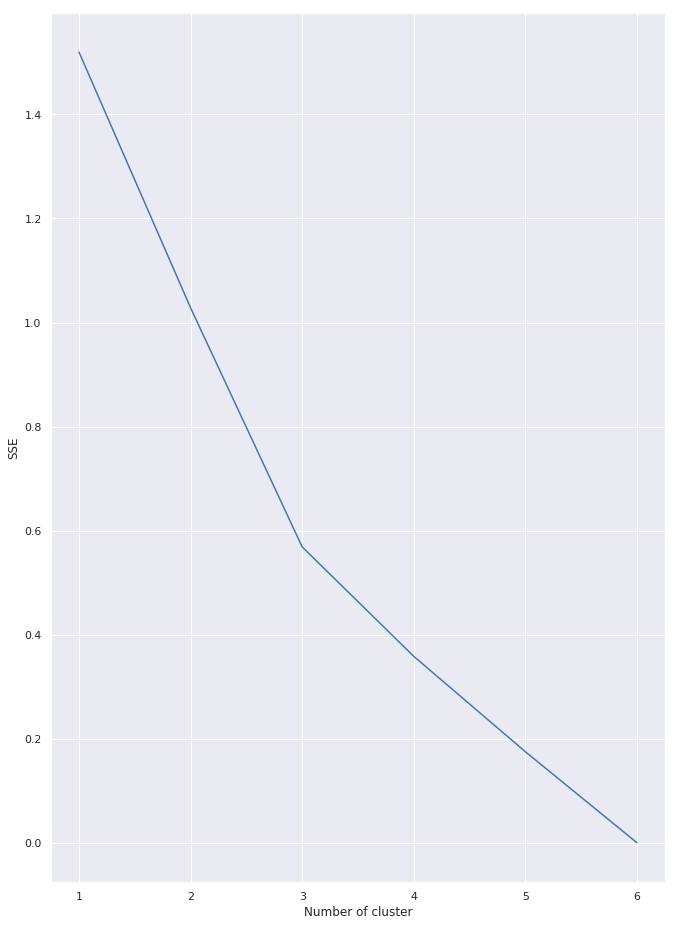

In [44]:
sse = {}
for k in range(1,7):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(chennai_venues_grouped.drop('Neighborhood',axis=1))
    chennai_venues_grouped['Cluster']=kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


## From the above graph, we can see the optimal value for cluster is 2

In [45]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [46]:
kmeans.fit(chennai_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [47]:
chennai_venues_grouped['Cluster'] = kmeans.labels_

In [48]:
chennai_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    1
1    2
2    1
3    1
4    1
Name: Neighborhood, dtype: int64

In [49]:
chennai_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM', 'Venue Category_Asian Restaurant',
       'Venue Category_Bakery', 'Venue Category_Breakfast Spot',
       'Venue Category_Café', 'Venue Category_Chinese Restaurant',
       'Venue Category_Coffee Shop', 'Venue Category_Convenience Store',
       'Venue Category_Department Store',
       'Venue Category_Fast Food Restaurant', 'Venue Category_Food',
       'Venue Category_Gym / Fitness Center', 'Venue Category_Hotel',
       'Venue Category_Indian Restaurant',
       'Venue Category_Middle Eastern Restaurant',
       'Venue Category_Optical Shop', 'Venue Category_Pharmacy',
       'Venue Category_Pizza Place', 'Venue Category_Soccer Field',
       'Venue Category_Tea Room', 'Cluster'],
      dtype='object')

In [50]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(chennai_venues_grouped,on='Neighborhood')

In [51]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Optical Shop,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Soccer Field,Venue Category_Tea Room,Cluster
0,Chitlapakkam,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,3
1,Kovilambakkam,Venue Category_Pharmacy,Venue Category_Hotel,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,...,0.0,0.5,0.0,0.0,0.0,0.5,0.00,0.0,0.0,4
2,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,0.0,0.0,0.2,0.0,0.0,0.0,0.20,0.0,0.0,1
3,Pallikaranai,Venue Category_ATM,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Pharmacy,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,2


In [52]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(chennai_venues,on='Neighborhood')

In [53]:

# create map
map_clusters = folium.Map(location=[chennai_latitude, chennai_longitude], zoom_start=11)

In [54]:

# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [141]:
map_clusters

## Finding similar locations based on user input (recommending location)

### We need to analyze factors such as population and Income to recommend

In [55]:
chennai_income.head()

,Borough,Neighborhoods,AverageIncome
0,South and East Chennai,Tambaram,18944.099790
1,South and East Chennai,Chitlapakkam,56837.022200
2,South and East Chennai,Kovilambakkam,41991.817440
3,South and East Chennai,Medavakkam,6667.447632
4,South and East Chennai,Pallikaranai,53270.063890


In [56]:

chennai_population.head()

,Borough,Neighborhoods,Population
0,South and East Chennai,Tambaram,174787
1,South and East Chennai,Chitlapakkam,37906
2,South and East Chennai,Kovilambakkam,27374
3,South and East Chennai,Medavakkam,29710
4,South and East Chennai,Pallikaranai,43493


In [57]:
chennai_population['Normalized_population'] = chennai_population['Population']/chennai_population['Population'].max(axis=0)
chennai_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,South and East Chennai,Tambaram,174787,1.000000
1,South and East Chennai,Chitlapakkam,37906,0.216870
2,South and East Chennai,Kovilambakkam,27374,0.156613
3,South and East Chennai,Medavakkam,29710,0.169978
4,South and East Chennai,Pallikaranai,43493,0.248834


In [58]:
chennai_income['Normalized_income'] = chennai_income['AverageIncome']/chennai_income['AverageIncome'].max(axis=0)
chennai_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,South and East Chennai,Tambaram,18944.099790,0.208251
1,South and East Chennai,Chitlapakkam,56837.022200,0.624806
2,South and East Chennai,Kovilambakkam,41991.817440,0.461613
3,South and East Chennai,Medavakkam,6667.447632,0.073295
4,South and East Chennai,Pallikaranai,53270.063890,0.585594


In [59]:
chennai_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Department Store,...,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Optical Shop,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Soccer Field,Venue Category_Tea Room,Cluster
0,Chitlapakkam,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,3


## recommending Middle East Restaurants

In [60]:
chennai_middle_east = chennai_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
chennai_middle_east.head()

,Neighborhood,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Breakfast Spot,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Department Store,...,Venue Category_Food,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Indian Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Optical Shop,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Soccer Field,Venue Category_Tea Room
0,Chitlapakkam,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,Kovilambakkam,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,Medavakkam,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,Pallikaranai,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sembakkam,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [61]:
chennai_middle_east['Venue Category_Middle Eastern Restaurant']

0    0
1    0
2    0
3    0
4    1
5    0
Name: Venue Category_Middle Eastern Restaurant, dtype: uint8

In [62]:
chennai_middle_east = chennai_middle_east[['Neighborhood','Venue Category_Middle Eastern Restaurant']]

In [63]:
chennai_middle_east.rename(columns={'Venue Category_Middle Eastern Restaurant':'NumberOfVenuefor_MiddleEasternRestaurant'},inplace=True)

In [64]:
chennai_middle_east['NumberOfVenuefor_MiddleEasternRestaurant']

0    0
1    0
2    0
3    0
4    1
5    0
Name: NumberOfVenuefor_MiddleEasternRestaurant, dtype: uint8

## Building a target neighborhood by providing a sample restaurant : say ' Tambaram '

In [65]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Tambaram']

In [66]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Soccer Field,Venue Category_Tea Room,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,18,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,...,0.166667,0.166667,1,South and East Chennai,12.922915,80.127457,Harithakom,12.922798,80.127328,Food
1,19,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,...,0.166667,0.166667,1,South and East Chennai,12.922915,80.127457,Captain's Corner,12.922469,80.128757,Tea Room
2,20,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,...,0.166667,0.166667,1,South and East Chennai,12.922915,80.127457,Vasan Eye Care,12.922429,80.128757,Optical Shop
3,21,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,...,0.166667,0.166667,1,South and East Chennai,12.922915,80.127457,tambaram railway ground,12.925500,80.127023,Soccer Field
4,22,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,...,0.166667,0.166667,1,South and East Chennai,12.922915,80.127457,"Ashwin Gym, East Tambaram, Chennai",12.926182,80.129000,Gym / Fitness Center
5,23,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,...,0.166667,0.166667,1,South and East Chennai,12.922915,80.127457,Authoor Mani Hotel,12.926617,80.127437,Breakfast Spot


In [67]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [68]:
target_cluster

1

In [69]:
print("The target cluster is : ",target_cluster)

The target cluster is :  1


In [70]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Soccer Field,Venue Category_Tea Room,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,The Cascade,12.917635,80.188866,Chinese Restaurant
7,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,Domino's Pizza,12.917500,80.190125,Pizza Place
8,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,Sangeetha Restaurant @ Medavakkam,12.917322,80.191035,Indian Restaurant
9,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,Hot Breads,12.917652,80.190582,Bakery
10,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,NILGIRIS SUPERMARKET,12.917861,80.189024,Convenience Store


In [71]:
print("There are {} neighborhoods which has similar characteristics to Tambaram.".format(possible_neighborhoods.shape[0]))

There are 11 neighborhoods which has similar characteristics to Tambaram.


In [72]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Soccer Field,Venue Category_Tea Room,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,6,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,The Cascade,12.917635,80.188866,Chinese Restaurant
1,7,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,Domino's Pizza,12.917500,80.190125,Pizza Place
2,8,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,Sangeetha Restaurant @ Medavakkam,12.917322,80.191035,Indian Restaurant
3,9,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,Hot Breads,12.917652,80.190582,Bakery
4,10,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,...,0.0,0.0,1,South and East Chennai,12.917143,80.192352,NILGIRIS SUPERMARKET,12.917861,80.189024,Convenience Store


In [74]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [76]:
chennai_middle_east.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

## Now we need to create ranking by combining population and income factors as well

In [77]:
possible_neighborhoods = possible_neighborhoods.merge(chennai_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(chennai_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(chennai_middle_east[['Neighborhoods','NumberOfVenuefor_MiddleEasternRestaurant']],on='Neighborhoods')

In [78]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVenuefor_MiddleEasternRestaurant
0,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,80.192352,The Cascade,12.917635,80.188866,Chinese Restaurant,29710,0.169978,6667.447632,0.073295,0
1,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,80.192352,Domino's Pizza,12.917500,80.190125,Pizza Place,29710,0.169978,6667.447632,0.073295,0
2,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,80.192352,Sangeetha Restaurant @ Medavakkam,12.917322,80.191035,Indian Restaurant,29710,0.169978,6667.447632,0.073295,0
3,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,80.192352,Hot Breads,12.917652,80.190582,Bakery,29710,0.169978,6667.447632,0.073295,0
4,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,80.192352,NILGIRIS SUPERMARKET,12.917861,80.189024,Convenience Store,29710,0.169978,6667.447632,0.073295,0


In [79]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfVenuefor_MiddleEasternRestaurant'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [80]:
recommended_neighborhoods

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVenuefor_MiddleEasternRestaurant,Ranking
0,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,Venue Category_Bakery,...,Harithakom,12.922798,80.127328,Food,174787,1.000000,18944.099790,0.208251,0,0.572888
1,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,Venue Category_Bakery,...,Captain's Corner,12.922469,80.128757,Tea Room,174787,1.000000,18944.099790,0.208251,0,0.572888
2,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,Venue Category_Bakery,...,Vasan Eye Care,12.922429,80.128757,Optical Shop,174787,1.000000,18944.099790,0.208251,0,0.572888
3,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,Venue Category_Bakery,...,tambaram railway ground,12.925500,80.127023,Soccer Field,174787,1.000000,18944.099790,0.208251,0,0.572888
4,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,Venue Category_Bakery,...,"Ashwin Gym, East Tambaram, Chennai",12.926182,80.129000,Gym / Fitness Center,174787,1.000000,18944.099790,0.208251,0,0.572888
5,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,Venue Category_Gym / Fitness Center,Venue Category_Food,Venue Category_Soccer Field,Venue Category_Convenience Store,Venue Category_Asian Restaurant,Venue Category_Bakery,...,Authoor Mani Hotel,12.926617,80.127437,Breakfast Spot,174787,1.000000,18944.099790,0.208251,0,0.572888
6,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,The Cascade,12.917635,80.188866,Chinese Restaurant,29710,0.169978,6667.447632,0.073295,0,0.110642
7,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,Domino's Pizza,12.917500,80.190125,Pizza Place,29710,0.169978,6667.447632,0.073295,0,0.110642
8,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_Asian Restaurant,Venue Category_Breakfast Spot,...,Sangeetha Restaurant @ Medavakkam,12.917322,80.191035,Indian Restaurant,29710,0.169978,6667.447632,0.073295,0,0.110642
9,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Convenience Store,Venue Category_Tea Room,Venue Category_Department Store,Venue Category_

In [86]:
top2 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [87]:

top2_df = pd.DataFrame(top2).reset_index()

In [89]:

top2_df.head(2)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Medavakkam,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Indian Restaurant,[0.11064233932496415]
1,Tambaram,Venue Category_Tea Room,Venue Category_Optical Shop,Venue Category_Breakfast Spot,[0.5728879249403372]


## Medavakkam has similar food to Tambaram restaurant's Middle east food!!